# Práctica 3

Presentado Por: David Alejandro Henao y Maria Camila Bravo.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd

# --->Función valor cuadrático medio.

In [31]:
def x_rms(signal):
    rms= np.sqrt(np.mean(signal**2))
    return rms

# ---> Obtencion de los arreglos 'asRec'(señal ECG regustrada) y 'filtrada'(señal asRec filtrada)

In [32]:
data = scipy.io.loadmat('signals.mat')
print(data.keys())
asRec = data['ECG_asRecording'].flatten()
filtrada = data['ECG_filtered'].flatten()


dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])


# Hallamos el tiempo

Se determina la duración total de las señales a partir del archivo .mat. Se creó un vector de tiempo correspondiente

In [80]:
n = int(asRec[0])  # Obtén el número de muestras
fs = 1024  # Frecuencia de muestreo en Hz
t = np.arange(len(asRec)) / fs # Vector de tiempo
t

array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       2.99970703e+01, 2.99980469e+01, 2.99990234e+01])

In [50]:
print(f"Length of t: {len(t)}")
print(f"Length of asRec: {len(asRec)}")


Length of t: 30720
Length of asRec: 30720


Dimencion del vector t vs asRec , deben ser iguales para grafica correspondiente

# ---> Comparación de las señales asRec y Filtrada

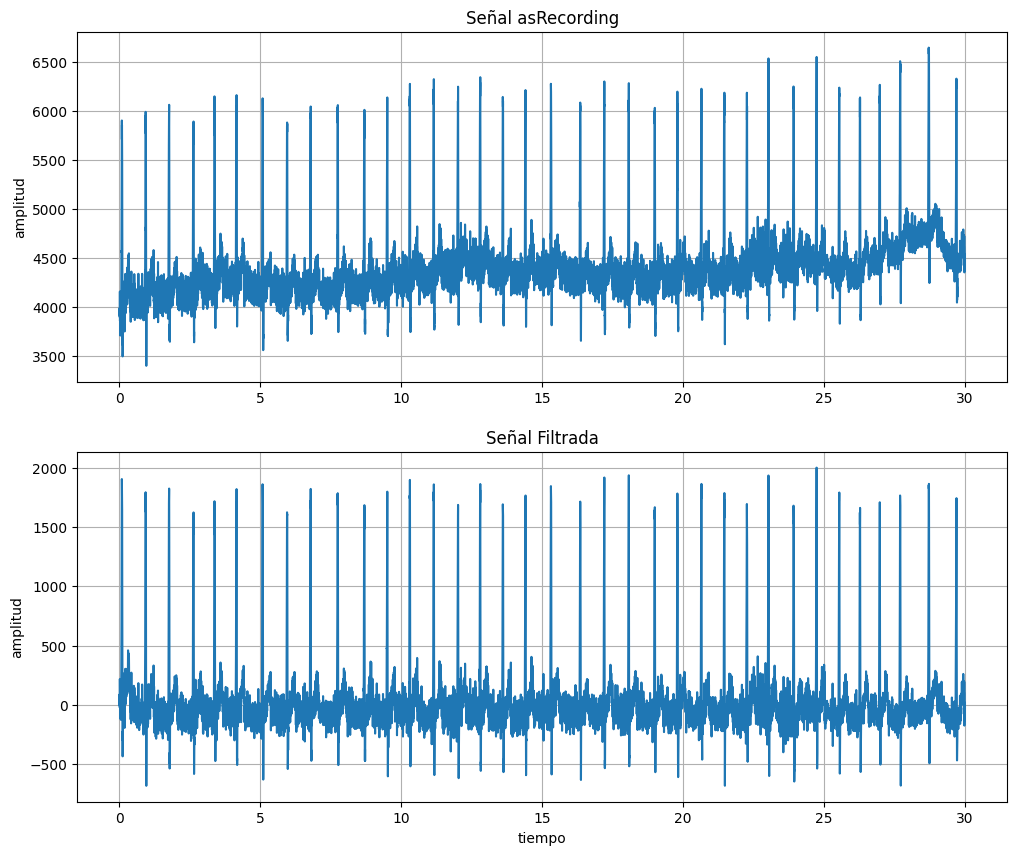

In [51]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(t,asRec[:])
plt.title('Señal asRecording')
plt.ylabel('amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t,filtrada[:])
plt.title('Señal Filtrada')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.grid(True)
plt.show()

# ---> Valores RMS de las señales asRec y Filtrada

In [52]:
rms_asRec = x_rms(asRec)
rms_filtrada = x_rms(filtrada)
print(f"RMS ECG registrada: {rms_asRec}")
print(f"RMS ECG filtrada: {rms_filtrada}")

RMS ECG registrada: 4392.9682937490725
RMS ECG filtrada: 286.30557115249496


# OBSERVACIONES
#### Con respecto a la señal asRec vemos que esta 'montada' y tiene una tendencia a crecer, al aplicar el filto este actua como una eliminación de offset, pues hay una reducción significativa de la amplitud (Parece que se usara la funcion detrend). Tambien en la señal filtrada se ve una reduccion en el ruido entre los que serian los picos R, esto puede ser producto de que la señal asRec tiene ruido de baja frecuencia y el filtro lo elimina;ruido conservando dichos picos. 




# ---> Un solo ciclo de asRec


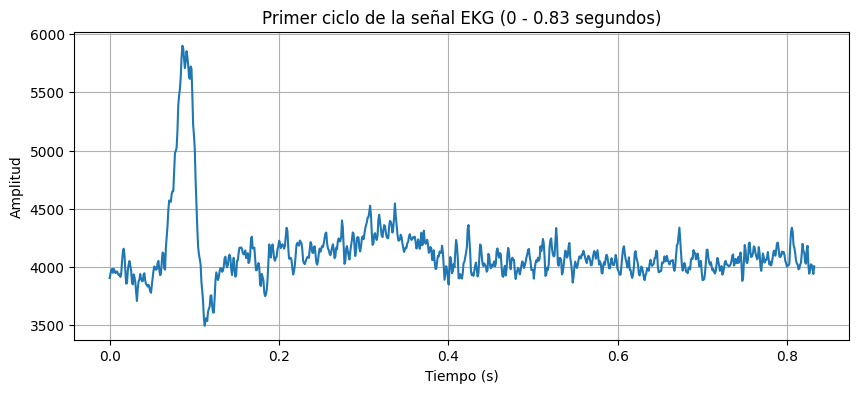

Promedio del primer ciclo: 4117.387503835269
Valor RMS del primer ciclo: 4127.522368515574
Varianza del primer ciclo: 83561.04585758828
Desviación estándar del primer ciclo: 289.0692751877796


In [53]:
#la señal dura 30 segundos y hay 30 picos, es decir hay un ciclo cada 0.83s aproximadamente
ciclo = 30/36
muestras = int(ciclo * fs)

# Extraer el primer ciclo de la señal
primer_ciclo_t = t[:muestras]
primer_ciclo_s = asRec[0:muestras]

# Graficar el primer ciclo
plt.figure(figsize=(10, 4))
plt.plot(primer_ciclo_t, primer_ciclo_s)
plt.title('Primer ciclo de la señal EKG (0 - 0.83 segundos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

prom = np.mean(primer_ciclo_s)
rms_c1 = x_rms(primer_ciclo_s)
varianza = np.var(primer_ciclo_s)
desviacion = np.std(primer_ciclo_s)

print(f"Promedio del primer ciclo: {prom}")
print(f"Valor RMS del primer ciclo: {rms_c1}")
print(f"Varianza del primer ciclo: {varianza}")
print(f"Desviación estándar del primer ciclo: {desviacion}")


#### El análisis estadístico del ciclo de la señal ECG muestra que la amplitud promedio es de 4117.39 unidades, lo que refleja un valor central en torno al cual fluctúan los datos. También confirma la presencia del offset mencionado anteriori mente producto  de los agentes externos que generan ruido. El valor RMS, que es ligeramente mayor, indica una magnitud efectiva que capta la energía total de la señal con sus variaciones. El valor alto de varianza sugiere una dispersión considerable en los valores de amplitud, destacando la influencia del pico R presente. Y fianlmente,la desviación, refuerza esta dispersión, señalando que las amplitudes tienden a variar significativamente respecto al promedio a lo largo del ciclo.

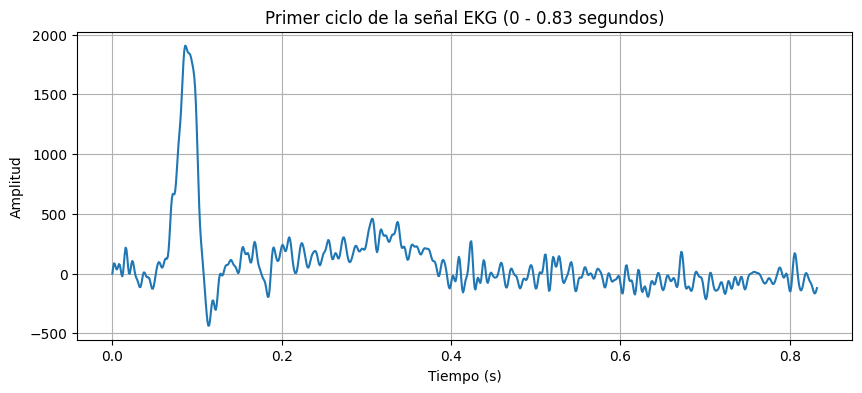

Promedio del ciclo: 86.7684631038628
Valor RMS del ciclo: 319.2743328171337
Varianza del ciclo: 94407.33340641946
Desviación estándar del primer ciclo: 307.25776378542406


In [54]:
ciclo = 30/36
muestras = int(ciclo * fs)

# Extraer el primer ciclo de la señal
primer_ciclo_t = t[:muestras]
primer_ciclo_s = filtrada[0:muestras]

# Graficar el primer ciclo
plt.figure(figsize=(10, 4))
plt.plot(primer_ciclo_t, primer_ciclo_s)
plt.title('Primer ciclo de la señal EKG (0 - 0.83 segundos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

prom = np.mean(primer_ciclo_s)
rms_c1 = x_rms(primer_ciclo_s)
varianza = np.var(primer_ciclo_s)
desviacion = np.std(primer_ciclo_s)

print(f"Promedio del ciclo: {prom}")
print(f"Valor RMS del ciclo: {rms_c1}")
print(f"Varianza del ciclo: {varianza}")
print(f"Desviación estándar del primer ciclo: {desviacion}")

### La reducción drástica del promedio y el valor RMS en la señal filtrada indica una eficaz eliminación del desplazamiento de la línea base y del ruido de baja frecuencia (offset). Aunque pueda parecer contradictorio que la varianza aumente a pesar de la reducción en el promedio y el RMS, esto se puede justificar, pues el filtro podría haber amplificado ligeramente las componentes de alta frecuencia de la señal, lo que aumentaría la varianza.

# ---> 15 ciclos de la señal filtrada

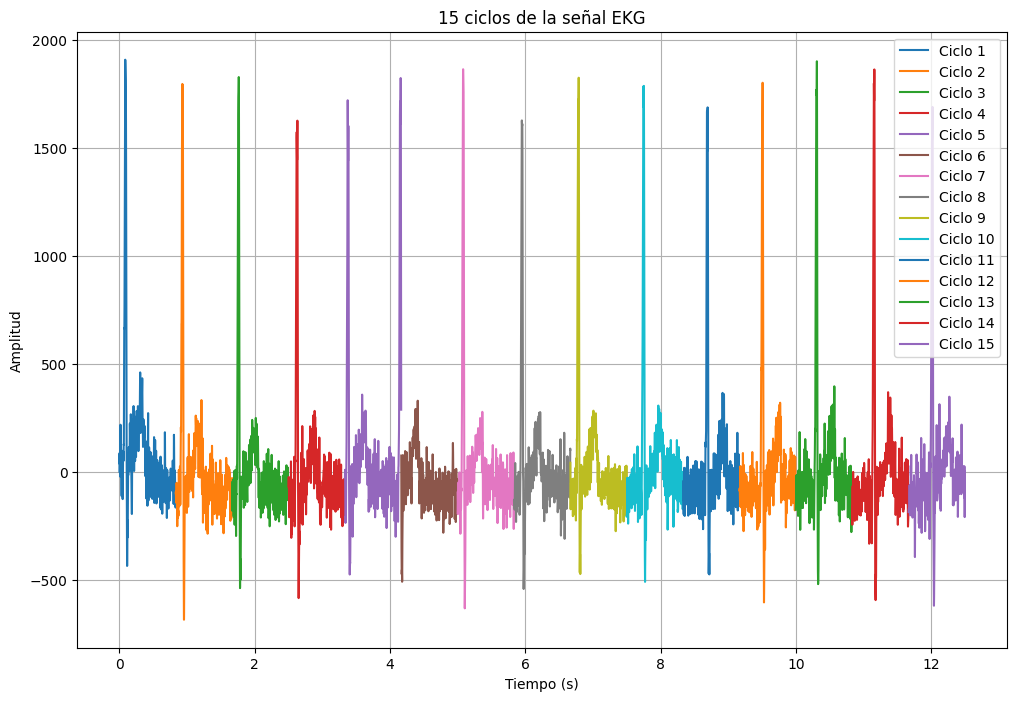

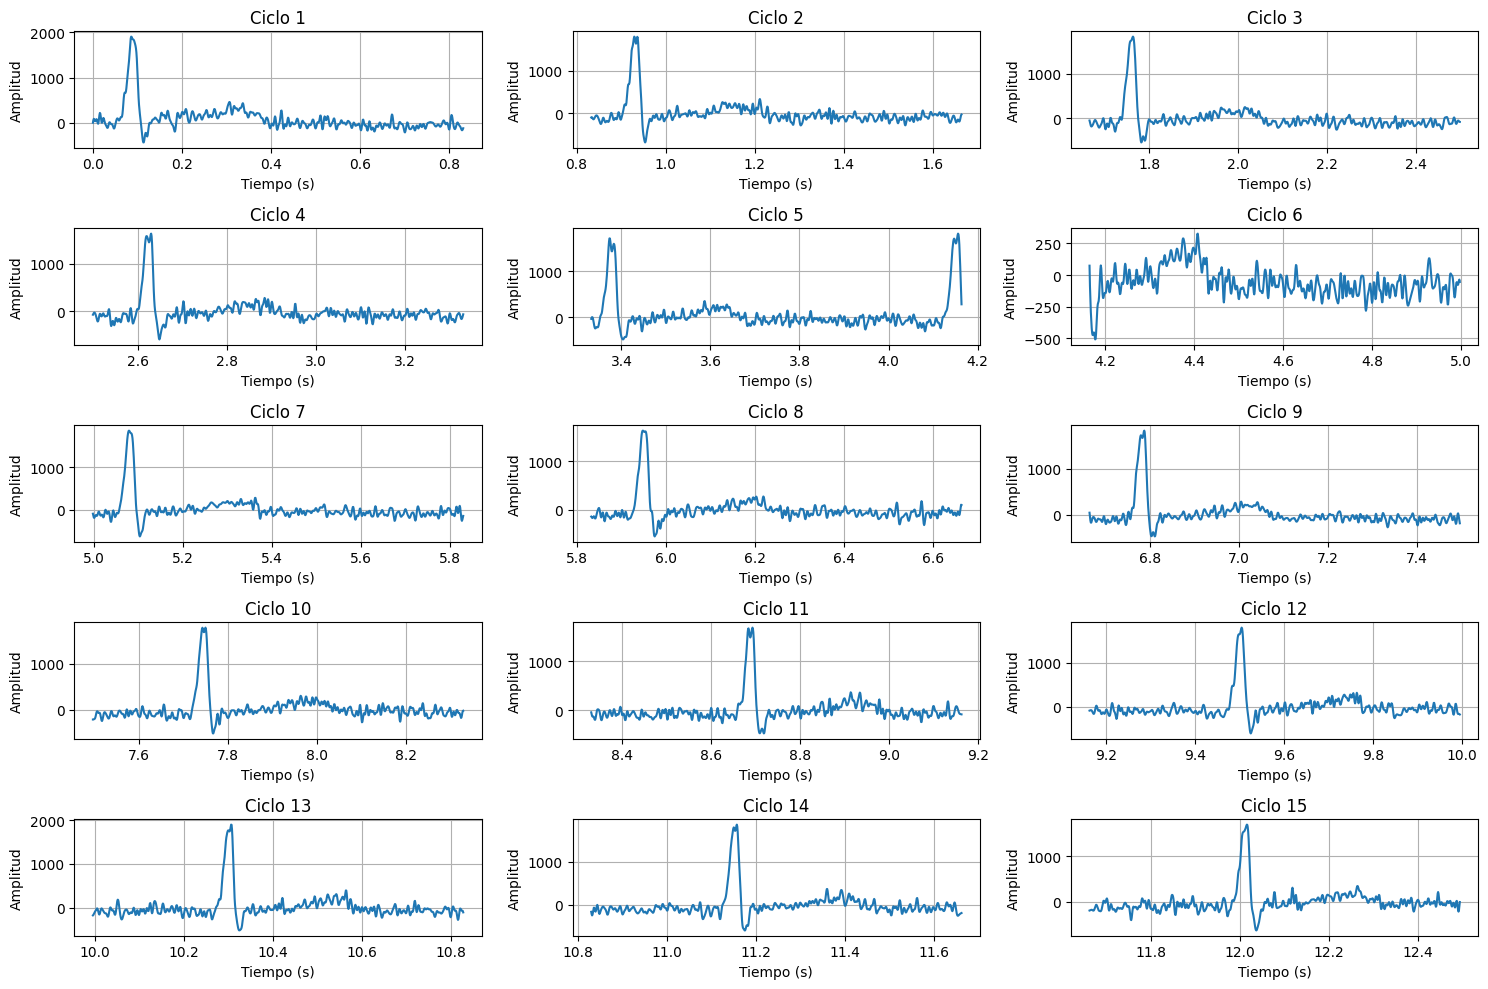

Ciclo 1: Promedio = 86.7684631038628, Varianza = 94407.33340641946
Ciclo 2: Promedio = -10.153151335412739, Varianza = 87610.59437977604
Ciclo 3: Promedio = -10.136423250155431, Varianza = 83639.97308572775
Ciclo 4: Promedio = -10.322998770014314, Varianza = 74001.77813636974
Ciclo 5: Promedio = 63.53203930826018, Varianza = 140662.36906450326
Ciclo 6: Promedio = -57.55977872475158, Varianza = 13767.73624625572
Ciclo 7: Promedio = 7.609845663557, Varianza = 86868.17053996348
Ciclo 8: Promedio = 3.65227678631177, Varianza = 71756.77845659244
Ciclo 9: Promedio = 2.769672331478076, Varianza = 83377.66099953649
Ciclo 10: Promedio = 21.704696433336718, Varianza = 81347.67837626307
Ciclo 11: Promedio = -2.5263520728195243, Varianza = 74951.89174569662
Ciclo 12: Promedio = -6.076733870161442, Varianza = 80459.50462613688
Ciclo 13: Promedio = 9.982239211714752, Varianza = 88620.75675238515
Ciclo 14: Promedio = -11.403967953027262, Varianza = 89997.23179798812
Ciclo 15: Promedio = 4.47813738159

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
num_ciclos = 15
promedios =[]
Varianzas =[]
# Graficar los 15 ciclos juntos
plt.figure(figsize=(12, 8))

for i in range(num_ciclos):
    inicio = i * muestras
    fin = inicio + muestras
    # Extraer el ciclo i-ésimo
    ciclo_t = t[inicio:fin]
    ciclo_s = filtrada[inicio:fin]
    # Graficar el ciclo
    plt.plot(ciclo_t, ciclo_s, label=f'Ciclo {i+1}')
    
plt.title('15 ciclos de la señal EKG')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

# Graficar cada ciclo por separado en subplots (5 filas x 3 columnas)
fig, axs = plt.subplots(5, 3, figsize=(15, 10)) 

for i in range(num_ciclos):
    inicio = i * muestras
    fin = inicio + muestras
    
    # Extraer el ciclo i-ésimo
    ciclo_t = t[inicio:fin]
    ciclo_s = filtrada[inicio:fin]
    promedio = np.mean(ciclo_s)
    varianza = np.var(ciclo_s)
    promedios.append(promedio)
    Varianzas.append(varianza)
    
    # Seleccionar el subplot adecuado (ax[i // 3, i % 3] para organización en cuadrícula)
    ax = axs[i // 3, i % 3]
    
    # Graficar el ciclo en su subplot correspondiente
    ax.plot(ciclo_t, ciclo_s)
    ax.set_title(f'Ciclo {i+1}')
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Amplitud')
    ax.grid(True)

if num_ciclos < 15:
    for j in range(num_ciclos, 15):
        fig.delaxes(axs.flatten()[j])
        
plt.tight_layout()
plt.show()

for i in range(num_ciclos):
    print(f"Ciclo {i+1}: Promedio = {promedios[i]}, Varianza = {Varianzas[i]}")



### La señal analizada no puede considerarse estacionaria, ya que tanto gráficamente como estadísticamente se observan variaciones significativas en los valores promedio y la varianza entre los diferentes ciclos. Este comportamiento sugiere que las características de la señal cambian con el tiempo, lo cual es típico de una señal no estacionaria.

# ---> Prueba t de student 

### Con el fin de comparar los dos ciclos primeros se extraen: Ciclo 1 y Ciclo 2 y a continuacion se resuelven comparación de supuestos.

In [67]:
from scipy import stats
# Función para extraer ciclos

def extraer_ciclos(señal, muestras, ciclo1_idx, ciclo2_idx):
    inicio1 = ciclo1_idx * muestras
    fin1 = inicio1 + muestras
    ciclo1 = señal[inicio1:fin1]

    inicio2 = ciclo2_idx * muestras
    fin2 = inicio2 + muestras
    ciclo2 = señal[inicio2:fin2]

    return ciclo1, ciclo2

# Extraer dos ciclos específicos
ciclo1, ciclo2 = extraer_ciclos(filtrada, muestras, 0, 1)



 a. Normalidad 

In [68]:
# Verificar normalidad de los datos
stat_ciclo1, p_ciclo1 = stats.shapiro(ciclo1)
stat_ciclo2, p_ciclo2 = stats.shapiro(ciclo2)

print(f"Ciclo 1 - Estadístico de Shapiro: {stat_ciclo1}, p-valor: {p_ciclo1}")
print(f"Ciclo 2 - Estadístico de Shapiro: {stat_ciclo2}, p-valor: {p_ciclo2}")

Ciclo 1 - Estadístico de Shapiro: 0.6112231482066601, p-valor: 5.704208231187201e-40
Ciclo 2 - Estadístico de Shapiro: 0.5678571426227828, p-valor: 1.7533543419826905e-41


b. Independencia.

In [73]:
# Verificar independencia de los datos.

from scipy.stats import pearsonr

correlation, p_value = pearsonr(ciclo1, ciclo2)

print(f"Coeficiente de correlación de Pearson: {correlation}")
print(f"P-valor de la prueba de correlación: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Los ciclos no son independientes: Hay una correlación significativa.")
else:
    print("Los ciclos son independientes: No hay una correlación significativa.")

Coeficiente de correlación de Pearson: 0.7062781676024753
P-valor de la prueba de correlación: 8.5394833158152e-130
Los ciclos no son independientes: Hay una correlación significativa.


c. Homocedasticidad.

In [69]:
# Verificar homocedasticidad
stat_levene, p_levene = stats.levene(ciclo1, ciclo2)

print(f"Estadístico de Levene: {stat_levene}, p-valor: {p_levene}")

Estadístico de Levene: 2.7614068618043612, p-valor: 0.09674722470392806


#### Observaciones: Dado que los datos no cumplen con el supuesto de normalidad y los ciclos no son independientes, la prueba t paramétrica no es adecuada para determinar diferencias significativas entre los ciclos. Los resultados de la prueba de Shapiro-Wilk muestran que ambos ciclos de señal no siguen una distribución normal, con p-valores extremadamente bajos (p < 0.05). mientras que la independencia muestra que un coeficiente de correlación de Pearson es alto (0.706) y el p-valor es muy bajo (p < 0.05), lo que indica los ciclos no son independientes entre sí y el supuesto de homocedasticidad (igualdad de varianzas) se cumple.

In [74]:
# Realizar la prueba U de Mann-Whitney
u_stat, p_mannwhitney = stats.mannwhitneyu(ciclo1, ciclo2)

print(f"Estadístico U de Mann-Whitney: {u_stat}")
print(f"P-valor: {p_mannwhitney}")

# Interpretar el p-valor
alpha = 0.05
if p_mannwhitney < alpha:
    print("Se rechaza la hipótesis nula: Hay una diferencia significativa entre los ciclos.")
else:
    print("No se rechaza la hipótesis nula: No hay una diferencia significativa entre los ciclos.")

Estadístico U de Mann-Whitney: 496175.0
P-valor: 1.0579196181457696e-38
Se rechaza la hipótesis nula: Hay una diferencia significativa entre los ciclos.


In [75]:
from scipy.stats import ttest_ind, ttest_ind_from_stats


# Prueba t student 
t_stat, p_val = ttest_ind(ciclo1, ciclo2, equal_var=True)

print(f"Estadístico t: {t_stat}")
print(f"P-valor: {p_val}")

# Si la varianza no es igual (Prueba t de Welch)
t_stat_welch, p_val_welch = ttest_ind(ciclo1, ciclo2, equal_var=False)

print(f"Estadístico t de Welch: {t_stat_welch}")
print(f"P-valor de Welch: {p_val_welch}")

Estadístico t: 6.631066055140001
P-valor: 4.4605715665565324e-11
Estadístico t de Welch: 6.63106605514
P-valor de Welch: 4.46235463029609e-11


#### Las pruebas realizadas indican diferencias significativas entre los ciclos, pero la falta de cumplimiento de los supuestos de normalidad e independencia sugiere no hacer la prueba de t . en ausencia del cumplimiento de los supuestos se realizo la prueba U de Mann-Whitney , confirmando las diferencias significativas observadas.

#### El estadístico t de Welch es igual al estadístico de prueba t calculado, ya que la prueba de Welch es una forma ajustada de la prueba t para muestras con varianzas desiguales. En este caso, ambos estadísticos t son iguales, lo que sugiere que la varianza entre los ciclos es relativamente similar. Por lo tanto La coincidencia  sugiere que la homocedasticidad (igualdad de varianzas) es razonablemente adecuada en este caso.

# ---> Prueba de Dickey-Fuller

In [79]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

dick_full = adfuller(filtrada)
print('Estadístico ADF:', dick_full[0])
print(' EL p-valor es:', dick_full[1])
print('Los valores críticos son: ',dick_full[4])


Estadístico ADF: -26.229486291033652
 EL p-valor es: 0.0
Los valores críticos son:  {'1%': np.float64(-3.4305630243276717), '5%': np.float64(-2.861634151073544), '10%': np.float64(-2.5668201137295887)}


#### Observaciones: Dado que el estadístico ADF es mucho menor que los valores críticos y el p-valor es muy bajo, se rechaza la hipótesis nula. Por lo tanto, puede se puede concluir que la serie temporal es estacionaria. las pruebas estadísticas realizadas sugieren que hay diferencias significativas entre los ciclos y que la serie de datos es estacionaria. La prueba U de Mann-Whitney y preuba de t (aunque no aplico los supuestos de normalidad e independiencia )proporcionaron tambien una hipotesis nula y  una validación adicional en el caso de datos no normales, mientras que la prueba de Dickey-Fuller asegura la validez de los análisis  al confirmar que se trata de una serie estasionaria.

 # Conclusiones

#### -Se obtuvieron diferencias Significativas al no cumplirse los supuestos de normalidad e independencia para la prueba t student se realizo la prueba U de Mann-Whitney, que es adecuada para datos no paramétricos, mostró diferencias significativas entre los ciclos. 

#### -Se determuino que la seňal a traves del tiempo es estacionaria , Esto significa que la serie tiene propiedades estadísticas constantes en el tiempo. 

#### -Se obtuvieron limitaciones para desarrollar la Prueba t: Aunque la prueba t mostró diferencias significativas, no es la mejor opción cuando los datos no siguen una distribución normal. La prueba U de Mann-Whitney, en cambio, proporciona una alternativa robusta que no requiere que los datos sean normales e ideal para datos no parametricos.


# Referencias


1. Lorenzoro, J. (2015). Técnicas de análisis de señales biomédicas para la detección de arritmias [Tesis de maestría, Universitat Oberta de Catalunya]. UOC. https://openaccess.uoc.edu/bitstream/10609/40186/6/jlorenzoroTFC0115memoria.pdf

2. QuestionPro. (n.d.). Prueba t de Student: ¿Qué es y cómo se usa en estadística? Recuperado de https://www.questionpro.com/blog/es/prueba-t-de-student/

3. Statology. (2020, October 15). Dickey-Fuller test in Python: A step-by-step guide. Recuperado de https://www.statology.org/dickey-fuller-test-python/